In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train,y_train),(x_test,y_test)=keras.datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [5]:
def show(x,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(x[index])
    plt.xlabel(classes[y[index][0]],color="blue")

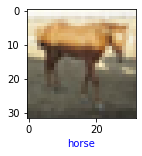

In [6]:
show(x_train,y_train,2000)

In [7]:
x_train=x_train/255
x_test=x_test/255

In [22]:
Ann_model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(700,activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(170,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])
Ann_model.compile(optimizer="SGD",loss="sparse_categorical_crossentropy",metrics=['accuracy'])
Ann_model.fit(x_train,y_train,epochs=50)

Epoch 1/100
1563/1563 [==============================] - 4s 3ms/step - loss: 2.0988 - accuracy: 0.2202
Epoch 2/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.9040 - accuracy: 0.3096
Epoch 3/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.8255 - accuracy: 0.3403
Epoch 4/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.7763 - accuracy: 0.3615
Epoch 5/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.7414 - accuracy: 0.3753
Epoch 6/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.7088 - accuracy: 0.3884
Epoch 7/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6807 - accuracy: 0.3984
Epoch 8/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6577 - accuracy: 0.4065
Epoch 9/100
1563/1563 [==============================] - 16s 10ms/step - loss: 1.6386 - accuracy: 0.4148
Epoch 10/100
1563/1563 [==============================] -

In [23]:
Ann_model.evaluate(x_train,y_train)

1563/1563 [==============================] - 2s 1ms/step - loss: 0.9091 - accuracy: 0.6885


[0.9090649485588074, 0.6884599924087524]

In [24]:
Ann_model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.2396 - accuracy: 0.5616


[1.2396281957626343, 0.5616000294685364]

In [16]:
from sklearn.metrics import classification_report
y_pred=Ann_model.predict(x_test)
y_pred_classes=[np.argmax(element) for element in y_pred]
print("classification_report: \n",classification_report(y_test,y_pred_classes))

classification_report: 
               precision    recall  f1-score   support

           0       0.69      0.50      0.58      1000
           1       0.70      0.65      0.67      1000
           2       0.35      0.62      0.44      1000
           3       0.39      0.37      0.38      1000
           4       0.49      0.41      0.45      1000
           5       0.51      0.38      0.43      1000
           6       0.51      0.70      0.59      1000
           7       0.72      0.53      0.61      1000
           8       0.80      0.55      0.65      1000
           9       0.55      0.67      0.60      1000

    accuracy                           0.54     10000
   macro avg       0.57      0.54      0.54     10000
weighted avg       0.57      0.54      0.54     10000



In [34]:
Cnn_model=keras.Sequential([
    #cnn
    keras.layers.Conv2D(24,(3,3),activation="relu",input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(45,(3,3),activation="relu"),
    keras.layers.MaxPooling2D((2,2)),
    #dense_layers
    keras.layers.Flatten(),
    keras.layers.Dense(1500,activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation="softmax"),
])
Cnn_model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])
Cnn_model.fit(x_train,y_train,epochs=50)

Epoch 1/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.4168 - accuracy: 0.4921
Epoch 2/50
1563/1563 [==============================] - 4s 3ms/step - loss: 1.0596 - accuracy: 0.6271
Epoch 3/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.8992 - accuracy: 0.6852
Epoch 4/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.7820 - accuracy: 0.7276
Epoch 5/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.6839 - accuracy: 0.7614
Epoch 6/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.5843 - accuracy: 0.7973
Epoch 7/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.5015 - accuracy: 0.8258
Epoch 8/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.4294 - accuracy: 0.8501
Epoch 9/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.3593 - accuracy: 0.8737
Epoch 10/50
1563/1563 [==============================] - 4s 3ms/step - loss: 0.311

In [35]:
Cnn_model.evaluate(x_train,y_train)

1563/1563 [==============================] - 2s 2ms/step - loss: 0.0039 - accuracy: 0.9988


[0.0039175283163785934, 0.9987800121307373]

In [36]:
Cnn_model.evaluate(x_test,y_test)

313/313 [==============================] - 0s 2ms/step - loss: 2.1783 - accuracy: 0.7223


[2.1782894134521484, 0.7222999930381775]

In [55]:
Ann_model.evaluate(x_train,y_train)

1563/1563 [==============================] - 4s 2ms/step - loss: 0.1223 - accuracy: 0.9583


[0.1222650483250618, 0.9582800269126892]

In [56]:
Ann_model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 2.1857 - accuracy: 0.5536


[2.185718059539795, 0.553600013256073]

In [37]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
cnn_model=keras.Sequential([
    #cnn
    keras.layers.Conv2D(24,(3,3),activation="relu",input_shape=(32,32,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(45,(3,3),activation="relu"),
    keras.layers.MaxPooling2D((2,2)),
    #dense_layers
    keras.layers.Flatten(),
    keras.layers.Dense(1500,activation="relu"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10,activation="softmax"),
])
cnn_model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [ ]:
cnn_model.fit(datagen.flow(x_train, y_train, batch_size=64),epochs=50,steps_per_epoch = x_train.shape[0] // 100)

In [31]:
x_train.shape[0]

50000